<a href="https://colab.research.google.com/github/Kylehanna/Instacart-Market-Basket-Analysis/blob/main/Notebooks/03_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
from statsmodels.graphics.mosaicplot import mosaic
color = sns.color_palette()

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/instacart_data.csv')

In [3]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt,dairy eggs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291077 entries, 0 to 1291076
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1291077 non-null  int64  
 1   product_id              1291077 non-null  int64  
 2   add_to_cart_order       1291077 non-null  int64  
 3   reordered               1291077 non-null  int64  
 4   product_name            1291077 non-null  object 
 5   aisle_id                1291077 non-null  int64  
 6   department_id           1291077 non-null  int64  
 7   user_id                 1291077 non-null  int64  
 8   eval_set                1291077 non-null  object 
 9   order_number            1291077 non-null  int64  
 10  order_dow               1291077 non-null  int64  
 11  order_hour_of_day       1291077 non-null  int64  
 12  days_since_prior_order  1291077 non-null  float64
 13  aisle                   1291077 non-null  object 
 14  de

In [5]:
# df = df['order_dow'].astype(object)

In [6]:
df.shape

(1291077, 15)

In [7]:
dfo = df.select_dtypes(include=['object'])

In [8]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291077 entries, 0 to 1291076
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   product_name  1291077 non-null  object
 1   eval_set      1291077 non-null  object
 2   aisle         1291077 non-null  object
 3   department    1291076 non-null  object
dtypes: object(4)
memory usage: 39.4+ MB


In [9]:
#Determine which categorical features should be transformed into indicator variables
dfo.product_name.nunique()

32463

In [10]:
dfo.aisle.nunique()

104

In [11]:
dfo.department.nunique()


13

In [12]:
#dfo = dfo['department']

In [13]:
#order_dow (Order Day of the Week (Monday, Tuesday...Sunday) is a categorical value that is represented numerically.
#dfo['user_id']= df['user_id'].astype('category') #User_id crash RAM when converted to str, keep as numeric value rn.
dfo['order_dow']= df['order_dow'].astype('str')


In [14]:
#Implementing the assumption that order_dow '0' correlates to Sunday, as beginning of the week.
dfo['order_dow'].replace({'0':'Sunday', '1':'Monday','2':'Tuesday','3':'Wednesday', '4':'Thursday', '5':'Friday', '6':'Saturday'}, inplace=True)

In [15]:
dfo.drop(columns=['eval_set','aisle','product_name'], inplace=True)

In [16]:
dfo.head()

,department,order_dow
0,dairy eggs,Thursday
1,dairy eggs,Thursday
2,dairy eggs,Sunday
3,dairy eggs,Wednesday
4,dairy eggs,Thursday


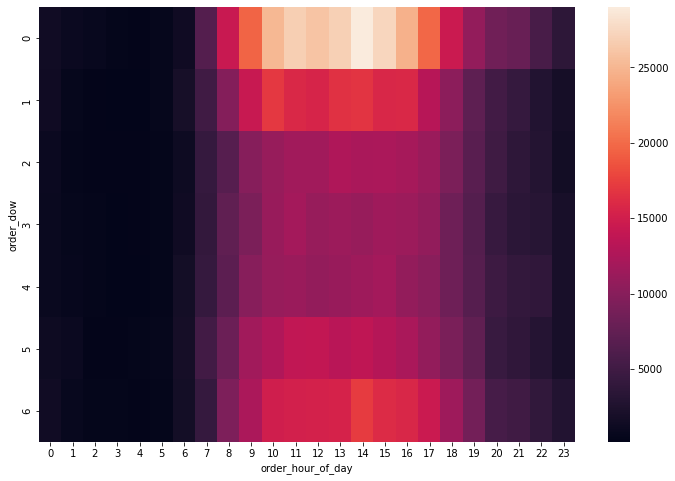

In [17]:
dow_hour_df = df.groupby(['order_dow','order_hour_of_day'])['order_number'].agg('count').reset_index()
dow_hour_df = dow_hour_df.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,8))
sns.heatmap(dow_hour_df)

`Department` will be the only categorical feature used in preprocessing. It has a relatively manageable count of unique variables (21). All other categorical variables have 100/1000+ nunique values. This would be exceptionally complex for this project.

In [18]:
dfo = pd.get_dummies(dfo)

In [19]:
df = pd.concat([df.drop(columns=['department', 'order_dow', 'eval_set', 'product_name'], axis=1), dfo], axis=1)

In [20]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_hour_of_day,days_since_prior_order,aisle,department_bakery,department_beverages,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_meat seafood,department_pantry,department_personal care,department_produce,department_snacks,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday
0,1,49302,1,1,120,16,112108,4,10,9.0,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,816049,49302,7,1,120,16,47901,14,6,16.0,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1242203,49302,1,1,120,16,2993,15,7,7.0,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1383349,49302,11,1,120,16,41425,4,8,14.0,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1787378,49302,8,0,120,16,187205,5,14,30.0,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
#Convert "Order_hour_of_day" into a datetime feature
t = pd.to_datetime(df['order_hour_of_day'], format='%H').dt.strftime('%H:%M')
t

0          10:00
1          06:00
2          07:00
3          08:00
4          14:00
           ...  
1291072    09:00
1291073    08:00
1291074    10:00
1291075    18:00
1291076    15:00
Name: order_hour_of_day, Length: 1291077, dtype: object

In [22]:
df['order_hour_of_day'] = t

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291077 entries, 0 to 1291076
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   order_id                    1291077 non-null  int64  
 1   product_id                  1291077 non-null  int64  
 2   add_to_cart_order           1291077 non-null  int64  
 3   reordered                   1291077 non-null  int64  
 4   aisle_id                    1291077 non-null  int64  
 5   department_id               1291077 non-null  int64  
 6   user_id                     1291077 non-null  int64  
 7   order_number                1291077 non-null  int64  
 8   order_hour_of_day           1291077 non-null  object 
 9   days_since_prior_order      1291077 non-null  float64
 10  aisle                       1291077 non-null  object 
 11  department_bakery           1291077 non-null  uint8  
 12  department_beverages        1291077 non-null  uint8  
 1

In [24]:
df.order_number.nunique()

97

In [25]:
dfn = df.select_dtypes(include=['int','float64'])
dfn

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,days_since_prior_order
0,1,49302,1,1,120,16,112108,4,9.0
1,816049,49302,7,1,120,16,47901,14,16.0
2,1242203,49302,1,1,120,16,2993,15,7.0
3,1383349,49302,11,1,120,16,41425,4,14.0
4,1787378,49302,8,0,120,16,187205,5,30.0
...,...,...,...,...,...,...,...,...,...
1291072,598463,5748,12,0,75,17,18409,7,30.0
1291073,698116,23892,49,1,75,17,109004,51,14.0
1291074,785032,23892,2,1,75,17,100903,18,18.0
1291075,878989,12831,7,1,75,17,180224,14,30.0


Standardize numeric values due to significant difference in value range. 

In [26]:
dfn.drop(columns=['order_id','product_id','aisle_id','department_id', 'user_id', 'reordered'], inplace=True)
dfn

,add_to_cart_order,order_number,days_since_prior_order
0,1,4,9.0
1,7,14,16.0
2,1,15,7.0
3,11,4,14.0
4,8,5,30.0
...,...,...,...
1291072,12,7,30.0
1291073,49,51,14.0
1291074,2,18,18.0
1291075,7,14,30.0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(dfn)
data_scaled

array([[-1.04489115, -0.78777669, -0.77515548],
       [-0.23133676, -0.18618313, -0.10345342],
       [-1.04489115, -0.12602377, -0.96707036],
       ...,
       [-0.90929875,  0.0544543 ,  0.08846146],
       [-0.23133676, -0.18618313,  1.23995072],
       [ 0.17544043,  0.53572915,  1.23995072]])

In [30]:
dfn = pd.DataFrame(data_scaled, columns=['add_to_cart_order','order_number','days_since_prior_order'])

In [31]:
df = pd.concat([df.drop(columns=['add_to_cart_order','reordered','order_number','days_since_prior_order'], axis=1), dfn], axis=1)
df

,order_id,product_id,aisle_id,department_id,user_id,order_hour_of_day,aisle,department_bakery,department_beverages,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_meat seafood,department_pantry,department_personal care,department_produce,department_snacks,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday,add_to_cart_order,order_number,days_since_prior_order
0,1,49302,120,16,112108,10:00,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.044891,-0.787777,-0.775155
1,816049,49302,120,16,47901,06:00,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.231337,-0.186183,-0.103453
2,1242203,49302,120,16,2993,07:00,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.044891,-0.126024,-0.967070
3,1383349,49302,120,16,41425,08:00,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.311033,-0.787777,-0.295368
4,1787378,49302,120,16,187205,14:00,yogurt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.095744,-0.727617,1.239951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291072,598463,5748,75,17,18409,09:00,laundry,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.446625,-0.607299,1.239951
1291073,698116,23892,75,17,109004,08:00,laundry,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,5.463544,2.039713,-0.295368
1291074,785032,23892,75,17,100903,10:00,laundry,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.909299,0.054454,0.088461
1291075,878989,12831,75,17,180224,18:00,laundry,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.231337,-0.186183,1.239951


# Save preprocessed data in new csv

In [34]:
# save the data to a new csv file
#datapath = '../../data'
#save_file(df, 'processed.csv', datapath)

df.to_csv('processed_data.csv',index=False)